# Estudo prático da estrutura das redes neurais recorrentes

#### Sabrina Otoni da Silva - 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
base = pd.read_csv('poluicao.csv')
base = base.dropna()
base = base.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd',], axis = 1)
base_treinamento = base.iloc[:, 1:7].values
poluicao = base.iloc[:, 0].values

In [3]:
normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

poluicao = poluicao.reshape(-1, 1)
poluicao_normalizado = normalizador.fit_transform(poluicao)

In [4]:
previsores = []
poluicao_real = []

for i in range(10, 41757):
    previsores.append(base_treinamento_normalizada[i-10:i, 0:6])
    poluicao_real.append(poluicao_normalizado[i, 0])

previsores, poluicao_real = np.array(previsores), np.array(poluicao_real)

In [5]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', 
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, poluicao_real, epochs = 100, batch_size = 64)

Epoch 1/100
653/653 [==============================] - 43s 41ms/step - loss: 0.0079 - mean_absolute_error: 0.0652
Epoch 2/100
653/653 [==============================] - 25s 39ms/step - loss: 0.0074 - mean_absolute_error: 0.0633
Epoch 3/100
653/653 [==============================] - 25s 38ms/step - loss: 0.0073 - mean_absolute_error: 0.0624
Epoch 4/100
653/653 [==============================] - 25s 38ms/step - loss: 0.0071 - mean_absolute_error: 0.0616
Epoch 5/100
653/653 [==============================] - 23s 36ms/step - loss: 0.0069 - mean_absolute_error: 0.0607
Epoch 6/100
653/653 [==============================] - 23s 36ms/step - loss: 0.0067 - mean_absolute_error: 0.0596
Epoch 7/100
653/653 [==============================] - 21s 32ms/step - loss: 0.0065 - mean_absolute_error: 0.0584
Epoch 8/100
653/653 [==============================] - 16s 24ms/step - loss: 0.0063 - mean_absolute_error: 0.0574
Epoch 9/100
653/653 [==============================] - 22s 34ms/step - loss: 0.0062 - me

In [6]:
previsoes = regressor.predict(previsores)
previsoes = normalizador.inverse_transform(previsoes)

previsoes.mean()
poluicao.mean()

1305/1305 [==============================] - 10s 6ms/step


98.61321455085375

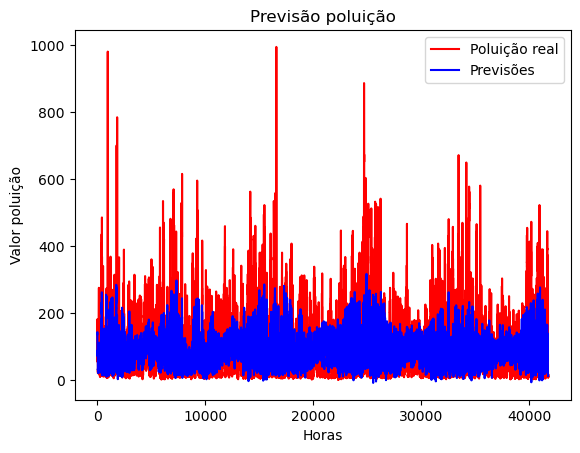

In [7]:
plt.plot(poluicao, color = 'red', label = 'Poluição real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão poluição')
plt.xlabel('Horas')
plt.ylabel('Valor poluição')
plt.legend()
plt.show()